<a href="https://colab.research.google.com/github/mark47B/DiffEq_Task_5/blob/master/Metody_Runge_Kutty.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

A = 1/14
B = 1/15
c = 1/14
a21 = c
b2 = 1.0 / (2.0 * c)  # b2 = 7.0
b1 = 1 - b2           # b1 = -6.0
y1 = B*np.pi
y2 = A*np.pi
(x0, xk) = (0,np.pi)
s = 2
eps = 1e-4

y1_pi_true = 0.2544987421377396
y2_pi_true = 0.1756247987851049

In [ ]:
def find_c1_c2(x, b1, b2):
    k = x / np.sqrt(210)
    A_ = [ [ np.cos(k), np.sin(k) ], [ -14/np.sqrt(210)*sin(k), 14/np.sqrt(210)*np.cos(k) ] ]
    b_ = [[b1], [b2]]
    ans = np.linalg.solve(A_,b_)
    c1 = ans[0][0]
    c2 = ans[1][0]
    return (c1, c2)

In [ ]:
c1, c2 = find_c1_c2(0, np.pi/15, np.pi/14)

In [ ]:
print(np.pi/15, np.pi/14 * np.sqrt(15/14))
print(c1, c2)

0.20943951023931953 0.23227552411342195
0.20943951023931953 0.23227552411342195


In [ ]:
def general_solution(x, c1:float=c1, c2:float=c2):
    y1 = c1 * np.cos(x/np.sqrt(210)) + c2 * np.sin(x/np.sqrt(210))
    y2 = -14/np.sqrt(210)*c1*np.sin(x/np.sqrt(210)) + 14/np.sqrt(210)*c2*np.cos(x/np.sqrt(210))
    return (y1,y2)

In [ ]:
general_solution(np.pi, c1, c2)

(0.2544987421377396, 0.17562479878510495)

# k1, k2 (с постоянным шагом)

In [ ]:
delta = pow((1/np.pi),s+1) + pow(np.sqrt((A*A*np.pi)**2 + ((-B)*B*np.pi)**2), s+1)
h = pow(eps/delta, 1/3)
print(f'Начальный шаг = {h}')

Начальный шаг = 0.14580534017295163


In [ ]:
def step(y1, y2, h):
    k11 = h*A*y2
    k21 = h*(-B)*y1
    
    k12 = h*A*(y2+a21*k21)
    k22 = h*(-B)*(y1+a21*k11)
    
    return (y1+b1*k11+b2*k12, y2+b1*k21+b2*k22)

In [ ]:
error = 1
errors = []

differences = []
points = []

s = 2
delta = pow((1/np.pi),s+1) + pow(np.sqrt((A*A*np.pi)**2 + ((-B)*B*np.pi)**2), s+1)
h = pow(eps/delta, 1/3)

print(f'Начальный шаг = {h}')

while error > eps:
#for i in range(10): # Поменять на while error > eps когда разберемся с погрешностью
    x0 = 0
    xk = x0
    y_next1 = y1
    y_next2 = y2
    # сначала с шагом h1 = h
    #print(f'============================Epoch = {i}============================')
    h1 = h

    while xk + h1 < np.pi:
        (y_next1, y_next2) = step(y_next1, y_next2, h1)
        xk += h1
        true_error_1 = y_next1 - general_solution(xk)[0] 
        true_erorr_2 = y_next2 - general_solution(xk)[1]
        differences.append(np.sqrt(true_error_1**2+true_erorr_2**2))
        points.append(xk)
        
        #print(xk)
        #print(y_next1, y_next2)

        if xk + h1 >= np.pi:
            h_final = np.pi - xk
            (y_next1, y_next2) = step(y_next1, y_next2, h_final)
            xk += h_final
            points.append(xk)
            true_error_1 = y_next1 - general_solution(xk)[0] 
            true_erorr_2 = y_next2 - general_solution(xk)[1]
            differences.append(np.sqrt(true_error_1**2+true_erorr_2**2))
            #print(xk)
            #print(y_next1, y_next2)
    
    res_h1_0, res_h1_1 = (y_next1, y_next2) # y с чертой (-y)
    print(f'final estimation with h = {h1}, results = {xk, res_h1_0, res_h1_1}')

    xk = x0
    y_next1 = y1
    y_next2 = y2
    h2 = h/2

    while xk + h2 < np.pi:
        (y_next1, y_next2) = step(y_next1, y_next2, h2)
        xk += h2
        #print(xk)
        #print(y_next1, y_next2)

        if xk + h2 >= np.pi:
            h_final = np.pi - xk
            (y_next1, y_next2) = step(y_next1, y_next2, h_final)
            xk += h_final
            #print(xk)
            #print(y_next1, y_next2)
    
    res_h2_0, res_h2_1 = (y_next1, y_next2) # y с волной (~y)
    print(f'final estimation with h = {h2}, results = {xk, res_h2_0, res_h2_1}')
    # -y - h
    # ~y - h/2
    err1 = (res_h2_0 - res_h1_0)/(pow(2,s)-1) # ~Ri0
    err2 = (res_h2_1 - res_h1_1)/(pow(2,s)-1) # ~Ri1
    error = np.sqrt(err1**2 + err2**2)
    
    print(error)
    errors.append(error)
    print("Absolute error = ", y1_pi_true - res_h1_0, y2_pi_true - res_h1_1)
    
    h /= 2

Начальный шаг = 0.14580534017295163
final estimation with h = 0.14580534017295163, results = (3.141592653589793, 0.25449940210601096, 0.1756239202200542)
final estimation with h = 0.07290267008647582, results = (3.141592653589793, 0.2544989088926096, 0.1756245750389829)
2.732616346280652e-07
Absolute error =  -6.599682713659405e-07 8.785650506826226e-07


# k1, k2 (с автоматическим выбором шага)

In [ ]:
#print format(floatvalue, '.4f')

tol1 = 1e-5
tol2 = tol1/pow(2,s)
tol3 = tol2/pow(2,s+1)
# tol3 < tol2 < tol1 = 10^(-5)

xk = x0
eps = 1e-04
s = 2

delta = pow((1/np.pi),s+1) + pow(np.sqrt((A*A*np.pi)**2 + ((-B)*B*np.pi)**2), s+1)
h = pow(eps/delta, 1/(s+1)) / 2
h_i = h

h_list = []
points = []

print('eps = {:.6f}'.format(eps))
print('h = {:.6f}'.format(h))

print("Starting point y1_0, y2_0: {:.6f}, {:.6f}".format(y1,y2))
(y1_k, y2_k, y1_k_2, y2_k_2) = (y1,y2,y1,y2)

while xk + h_i < np.pi:
    y1_old = y1_k
    y2_old = y2_k
    (y1new, y2new) = step(y1_k, y2_k, h_i) # шаг с шагом h
    
    h_i2 = h_i / 2
    (y1newdva, y2newdva) = step(y1_k, y2_k, h_i2) # шаг с шагом h/2
    (y1_k_2, y2_k_2) = step(y1newdva, y2newdva, h_i2) # шаг с шагом h/2
    
    (y1_k, y2_k) = (y1new, y2new) # новые найденные знач-я y1_k, y2_k
    
    err1 = (y1_k_2 - y1_k)/(1 - pow(2, -s)) # ~Ri0
    err2 = (y2_k_2 - y2_k)/(1 - pow(2, -s)) # ~Ri1
    error = np.sqrt(err1**2 + err2**2)
    
    if (error > eps * pow(2,s)):
        h_i /= 2
        print('h_i has been decreased by 2')
        y1_k = y1_old
        y2_k = y2_old
        y1_k_2 = y1_old
        y2_k_2 = y2_old
    
    elif (error > eps and error <= eps * pow(2, s)):
        print('xk = {:.6f}, h_i = {:.6f}'.format(xk, h_i), end = ' ')
        points.append(xk)
        h_list.append(h_i)
        y1_k = y1_k_2
        y2_k = y2_k_2
        xk += h_i
        h_i /= 2       
        #roo = pow((y1_k - y1real(x0)) * (y1_k - y1real(x0)) + (y2_k - y2real(x0)) * (y2_k - y2real(x0)), 0.5);
        #print(f'xk = {xk}, errors = {abs(roo), abs(error)}') 
        # y1real, y2real - трушные значения решения в точке Pi (из общего решения руками найти)
    
    elif (error >= eps / pow(2,s+1) and error <= eps):
        print('xk = {:.6f}, h_i = {:.6f}'.format(xk, h_i), end = ' ')
        points.append(xk)
        h_list.append(h_i)
        y1_k = y1new
        y2_k = y2new
        xk += h_i
        h_i = h_i
        #roo = pow((y1_k - y1real(x0)) * (y1_k - y1real(x0)) + (y2_k - y2real(x0)) * (y2_k - y2real(x0)), 0.5);
        #print(f'xk = {xk}, errors = {abs(roo), abs(error)}')
        
    else:
        print('xk = {:.6f}, h_i = {:.6f}'.format(xk,h_i), end = ' ')
        points.append(xk)
        h_list.append(h_i)
        y1_k = y1new
        y2_k = y2new
        xk += h_i
        h_i = h_i * 2

        #roo = pow((y1_k - y1real(x0)) * (y1_k - y1real(x0)) + (y2_k - y2real(x0)) * (y2_k - y2real(x0)), 0.5);
        #print(f'xk = {xk}, errors = {abs(roo), abs(error)}')

    print('y1_k = {:.8f}, y2_k = {:.8f}'.format(y1_k, y2_k))
        
# now final step to reach xk = pi
print('y1_k, y2_k before last step = ', y1_k, y2_k)
h_final = np.pi - xk
print('xk = ', xk)
print('h_final = ', h_final)
h_list.append(h_final)
points.append(np.pi)
(y1new, y2new) = step(y1_k, y2_k, h_final)
(y1_k, y2_k) = (y1new, y2new)
print(f'final result at xk = {xk + h_final}: {y1_k, y2_k}')

print("Absolute error = ", y1_pi_true - y1_k, y2_pi_true - y2_k)

eps = 0.000100
h = 0.072903
Starting point y1_0, y2_0: 0.209440, 0.224399
xk = 0.000000, h_i = 0.072903 y1_k = 0.21060538, y2_k = 0.22337872
xk = 0.072903, h_i = 0.145805 y1_k = 0.21292114, y2_k = 0.22132026
xk = 0.218708, h_i = 0.291611 y1_k = 0.21748798, y2_k = 0.21713611
xk = 0.510319, h_i = 0.583221 y1_k = 0.22635744, y2_k = 0.20850401
xk = 1.093540, h_i = 1.166443 y1_k = 0.24299616, y2_k = 0.19022636
y1_k, y2_k before last step =  0.24299615955374118 0.19022636433382928
xk =  2.2599827726807504
h_final =  0.8816098809090427
final result at xk = 3.141592653589793: (0.2545254403000791, 0.175592484326443)
Absolute error =  -2.669816233952238e-05 3.2314458661891754e-05


# k1, k2, k3 (с постоянным шагом)

In [ ]:
def step_k1k2k3(y1, y2, h):
    k11 = h*A*y2
    k21 = h*(-B)*y1
    
    k12 = h*A*(y2+1/2*k21)
    k22 = h*(-B)*(y1+1/2*k11)

    k31 = h*A*(y2-k21+2*k22)
    k32 = h*(-B)*(y1-k11+2*k12)
    
    return (y1+1/6*(k11+4*k12+k31), y2+1/6*(k21+4*k22+k32))

In [ ]:
error = 1
errors = []

differences_k1k2k3 = []
points_k1k2k3 = []

s = 3
delta = pow((1/np.pi),s+1) + pow(np.sqrt((A*A*np.pi)**2 + ((-B)*B*np.pi)**2), s+1)
h = pow(eps/delta, 1/3)
print(f'Начальный шаг = {h}')

while error > eps: # Поменять на while error > eps когда разберемся с погрешностью
#for i in range(10):
    x0 = 0
    xk = x0
    y_next1 = y1
    y_next2 = y2
    # сначала с шагом h1 = h
    #print(f'============================Epoch = {i}============================')
    h1 = h

    while xk + h1 < np.pi:
        (y_next1, y_next2) = step_k1k2k3(y_next1, y_next2, h1)
        xk += h1
        points_k1k2k3.append(xk)
        true_error_1 = y_next1 - general_solution(xk)[0] 
        true_erorr_2 = y_next2 - general_solution(xk)[1]
        differences_k1k2k3.append(np.sqrt(true_error_1**2+true_erorr_2**2))
        
        print('xk = ', xk)
        print(y_next1, y_next2)

        if xk + h1 >= np.pi:
            h_final = np.pi - xk
            (y_next1, y_next2) = step_k1k2k3(y_next1, y_next2, h_final)
            xk += h_final
            points_k1k2k3.append(xk)
            true_error_1 = y_next1 - general_solution(xk)[0] 
            true_erorr_2 = y_next2 - general_solution(xk)[1]
            differences_k1k2k3.append(np.sqrt(true_error_1**2+true_erorr_2**2))
            #print(xk)
            print(y_next1, y_next2)
    
    res_h1_0, res_h1_1 = (y_next1, y_next2) # y с чертой (-y)
    print(f'final estimation with h = {h1}, results = {xk, res_h1_0, res_h1_1}')

    xk = x0
    y_next1 = y1
    y_next2 = y2
    h2 = h/2

    while xk + h2 < np.pi:
        (y_next1, y_next2) = step_k1k2k3(y_next1, y_next2, h2)
        xk += h2
        print('xk = ', xk)
        print(y_next1, y_next2)

        if xk + h2 >= np.pi:
            h_final = np.pi - xk
            (y_next1, y_next2) = step_k1k2k3(y_next1, y_next2, h_final)
            xk += h_final
            print('xk = ', xk)
            print(y_next1, y_next2)
    
    res_h2_0, res_h2_1 = (y_next1, y_next2) # y с волной (~y)
    print(f'final estimation with h = {h2}, results = {xk, res_h2_0, res_h2_1}')
    # -y - h
    # ~y - h/2
    err1 = (res_h2_0 - res_h1_0)/(pow(2,s)-1) # ~Ri0
    err2 = (res_h2_1 - res_h1_1)/(pow(2,s)-1) # ~Ri1
    error = np.sqrt(err1**2 + err2**2)
    
    print(error)
    errors.append(error)
    
    h /= 2

print("Absolute error = ", y1_pi_true - res_h1_0, y2_pi_true - res_h1_1)
#print("Absolute error = ", y1_pi_true - y1_k, y2_pi_true - y2_k)

Начальный шаг = 0.21356510045261798
xk =  0.21356510045261798
0.21283977763010567 0.22139328311922093
xk =  0.42713020090523596
0.21619381901864357 0.21833900729652933
xk =  0.6406953013578539
0.2195009059516197 0.2152373111369011
xk =  0.8542604018104719
0.22276032017361103 0.21208886828796664
xk =  1.0678255022630898
0.22597135378308061 0.20889436255011737
xk =  1.2813906027157078
0.22913330938612445 0.2056544877279931
xk =  1.4949557031683258
0.23224550024793603 0.2023699474797969
xk =  1.7085208036209438
0.23530725044195622 0.1990414551644697
xk =  1.9220859040735618
0.23831789499667544 0.19566973368675825
xk =  2.1356510045261796
0.24127678004005665 0.19225551534020954
xk =  2.3492161049787974
0.24418326294154769 0.18879954164812643
xk =  2.562781205431415
0.24703671245165212 0.18530256320251848
xk =  2.776346305884033
0.24983650883902822 0.1817653395010832
xk =  2.9899114063366508
0.2525820440250864 0.17818863878225324
0.2544987350676926 0.17562479378418278
final estimation with 

# k1, k2, k3 (с автоматическим выбором шага)

In [ ]:
#print format(floatvalue, '.4f')

tol1 = 1e-5
tol2 = tol1/pow(2,s)
tol3 = tol2/pow(2,s+1)
# tol3 < tol2 < tol1 = 10^(-5)

xk = x0
eps = 1e-04
s = 3

delta = pow((1/np.pi),s+1) + pow(np.sqrt((A*A*np.pi)**2 + ((-B)*B*np.pi)**2), s+1)
h = pow(eps/delta, 1/(s+1)) / 2
h_i = h

h_list_k1k2k3 = []
points_k1k2k3 = []

print('eps = {:.6f}'.format(eps))
print('h = {:.6f}'.format(h))

print("Starting point y1_0, y2_0: {:.6f}, {:.6f}".format(y1,y2))
(y1_k, y2_k, y1_k_2, y2_k_2) = (y1,y2,y1,y2)

while xk + h_i < np.pi:
    y1_old = y1_k
    y2_old = y2_k
    (y1new, y2new) = step_k1k2k3(y1_k, y2_k, h_i) # шаг с шагом h
    
    h_i2 = h_i / 2
    (y1newdva, y2newdva) = step_k1k2k3(y1_k, y2_k, h_i2) # шаг с шагом h/2
    (y1_k_2, y2_k_2) = step_k1k2k3(y1newdva, y2newdva, h_i2) # шаг с шагом h/2
    
    (y1_k, y2_k) = (y1new, y2new) # новые найденные знач-я y1_k, y2_k
    
    err1 = (y1_k_2 - y1_k)/(1 - pow(2, -s)) # ~Ri0
    err2 = (y2_k_2 - y2_k)/(1 - pow(2, -s)) # ~Ri1
    error = np.sqrt(err1**2 + err2**2)
    
    if (error > eps * pow(2,s)):
        h_i /= 2
        print('h_i has been decreased by 2')
        y1_k = y1_old
        y2_k = y2_old
        y1_k_2 = y1_old
        y2_k_2 = y2_old
    
    elif (error > eps and error <= eps * pow(2, s)):
        print('xk = {:.6f}, h_i = {:.6f}'.format(xk, h_i), end = ' ')
        points_k1k2k3.append(xk)
        h_list_k1k2k3.append(h_i)
        y1_k = y1_k_2
        y2_k = y2_k_2
        xk += h_i
        h_i /= 2       
        #roo = pow((y1_k - y1real(x0)) * (y1_k - y1real(x0)) + (y2_k - y2real(x0)) * (y2_k - y2real(x0)), 0.5);
        #print(f'xk = {xk}, errors = {abs(roo), abs(error)}') 
        # y1real, y2real - трушные значения решения в точке Pi (из общего решения руками найти)
    
    elif (error >= eps / pow(2,s+1) and error <= eps):
        print('xk = {:.6f}, h_i = {:.6f}'.format(xk, h_i), end = ' ')
        points_k1k2k3.append(xk)
        h_list_k1k2k3.append(h_i)
        y1_k = y1new
        y2_k = y2new
        xk += h_i
        h_i = h_i
        #roo = pow((y1_k - y1real(x0)) * (y1_k - y1real(x0)) + (y2_k - y2real(x0)) * (y2_k - y2real(x0)), 0.5);
        #print(f'xk = {xk}, errors = {abs(roo), abs(error)}')
        
    else:
        print('xk = {:.6f}, h_i = {:.6f}'.format(xk,h_i), end = ' ')
        points_k1k2k3.append(xk)
        h_list_k1k2k3.append(h_i)
        y1_k = y1new
        y2_k = y2new
        xk += h_i
        h_i = h_i * 2

        #roo = pow((y1_k - y1real(x0)) * (y1_k - y1real(x0)) + (y2_k - y2real(x0)) * (y2_k - y2real(x0)), 0.5);
        #print(f'xk = {xk}, errors = {abs(roo), abs(error)}')

    print('y1_k = {:.8f}, y2_k = {:.8f}'.format(y1_k, y2_k))
        
# now final step to reach xk = pi
print('y1_k, y2_k before last step = ', y1_k, y2_k)
h_final = np.pi - xk
print('xk = ', xk)
print('h_final = ', h_final)
h_list_k1k2k3.append(h_final)
points_k1k2k3.append(np.pi)
(y1new, y2new) = step_k1k2k3(y1_k, y2_k, h_final)
(y1_k, y2_k) = (y1new, y2new)
print(f'final result at xk = {xk + h_final}: {y1_k, y2_k}')

print("Absolute error = ", y1_pi_true - y1_k, y2_pi_true - y2_k)

eps = 0.000100
h = 0.157079
Starting point y1_0, y2_0: 0.209440, 0.224399
xk = 0.000000, h_i = 0.157079 y1_k = 0.21194490, y2_k = 0.22219310
xk = 0.157079, h_i = 0.314158 y1_k = 0.21688068, y2_k = 0.21770229
xk = 0.471237, h_i = 0.628315 y1_k = 0.22644417, y2_k = 0.20841588
xk = 1.099552, h_i = 1.256631 y1_k = 0.24427661, y2_k = 0.18868560
y1_k, y2_k before last step =  0.24427661074171492 0.18868560153967717
xk =  2.356182774433398
h_final =  0.7854098791563953
final result at xk = 3.141592653589793: (0.2544980461595508, 0.17562425012462737)
Absolute error =  6.959781888027372e-07 5.486604775228887e-07


# S3. Графики

# 3.2

Графики зависимости истинной полной погрешности от значения независимой переменной $x$ при 
интегрировании с полученным шагом $h$

ValueError: ignored

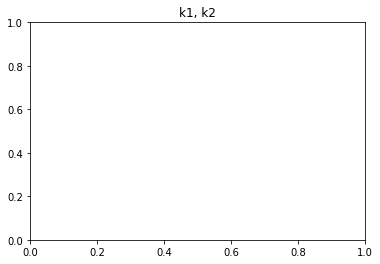

In [ ]:
plt.title('k1, k2')
plt.plot(points, differences, c='blue', ls = '--')
plt.scatter(points, differences, color='red')
plt.xlabel('$x$')
plt.ylabel('error')
plt.grid()

In [ ]:
plt.title('k1, k2, k3')
plt.plot(points_k1k2k3, differences_k1k2k3, c='blue', ls = '--')
plt.scatter(points_k1k2k3, differences_k1k2k3, color='red')
plt.xlabel('$x$')
plt.ylabel('error')
plt.grid()

# 3.3.1

Графики зависимости величины шага интегрирования $h$ от значения независимой 
переменной $x$

In [ ]:
plt.scatter(points, h_list, color='red', label = 'k1k2')
plt.plot(points, h_list, c='blue', ls = '--')

plt.scatter(points_k1k2k3, h_list_k1k2k3, label = 'k1k2k3', c = 'orange')
plt.plot(points_k1k2k3, h_list_k1k2k3, c = 'purple', ls = '--')

plt.xlabel('$x$')
plt.ylabel('$h_i$')
plt.grid()
plt.legend(loc='best')

# 3.3.2

Графики зависимости отношения __истинной локальной погрешности__ / __к полученной 
оценке локальной погрешности__ от значения независимой переменной $x$ (см. формулу (91)).

## k1, k2

In [ ]:
eps_points = []
num_calculations_k1k2 = []
x0 = 0
s = 2

for i in range(1, 10):
    eps = np.pow(10, -i)
    
    # --- 3.3.2 -------------------------------------------------
    if eps == np.pow(10, -5):
        points_xk_332_k1k2 = []
        errors_ratio_332_k1k2 = []
        
        points_xk_332_k1k2.append(0)
        errors_ratio_332_k1k2.append(0)
        
        y1_prev = B*np.pi 
        y2_prev = A*np.pi 
    # -----------------------------------------------------------
    
    eps_points.append(eps)
    cnt = 0
    error = 1
    xk = x0
    delta = pow((1/np.pi),s+1) + pow(np.sqrt((A*A*np.pi)**2 + ((-B)*B*np.pi)**2), s+1)
    h = pow(eps/delta, 1/(s+1))
    h_i = h

    #h_list_k1k2k3 = []
    #points_k1k2k3 = []

    print('eps = {:.6f}'.format(eps))
    print('h = {:.6f}'.format(h))

    print("Starting point y1_0, y2_0: {:.6f}, {:.6f}".format(y1,y2))
    (y1_k, y2_k, y1_k_2, y2_k_2) = (y1,y2,y1,y2)
    
    while xk + h_i < np.pi:
        y1_old = y1_k
        y2_old = y2_k
        (y1new, y2new) = step(y1_k, y2_k, h_i) # шаг с шагом h

        h_i2 = h_i / 2
        (y1newdva, y2newdva) = step(y1_k, y2_k, h_i2) # шаг с шагом h/2
        (y1_k_2, y2_k_2) = step(y1newdva, y2newdva, h_i2) # шаг с шагом h/2
        cnt += 3
        
        (y1_k, y2_k) = (y1new, y2new) # новые найденные знач-я y1_k, y2_k

        err1 = (y1_k_2 - y1_k)/(1 - pow(2, -s)) # ~Ri0
        err2 = (y2_k_2 - y2_k)/(1 - pow(2, -s)) # ~Ri1
        error = np.sqrt(err1**2 + err2**2)

        if (error > eps * pow(2,s)):
            h_i /= 2
            print('h_i has been decreased by 2')
            y1_k = y1_old
            y2_k = y2_old
            y1_k_2 = y1_old
            y2_k_2 = y2_old

        elif (error > eps and error <= eps * pow(2, s)):
            print('xk = {:.6f}, h_i = {:.6f}'.format(xk, h_i), end = ' ')
            y1_k = y1_k_2
            y2_k = y2_k_2
            xk += h_i
            h_i /= 2       

        elif (error >= eps / pow(2,s+1) and error <= eps):
            print('xk = {:.6f}, h_i = {:.6f}'.format(xk, h_i), end = ' ')
            y1_k = y1new
            y2_k = y2new
            xk += h_i
            h_i = h_i

        else:
            print('xk = {:.6f}, h_i = {:.6f}'.format(xk,h_i), end = ' ')
            y1_k = y1new
            y2_k = y2new
            xk += h_i
            h_i = h_i * 2

        print('y1_k = {:.8f}, y2_k = {:.8f}'.format(y1_k, y2_k)) 

        # --- 3.3.2 -------------------------------------------------
        if eps == 10**(-5):
            c1, c2 = find_c1_c2(points_xk_332_k1k2[-1], y1_prev, y2_prev)
            points_xk_332_k1k2.append(xk)
            y1_t, y2_t = general_solution(points_xk_332_k1k2[-1], c1, c2)
            
            loc_err = np.sqrt((y1_k-y1_t)**2 + (y2_k-y2_t)**2)
            errors_ratio_332_k1k2.append(loc_err / error)
            
            y1_prev = y1_k
            y2_prev = y2_k
        # -----------------------------------------------------------
        #print('h before last step = ', h)
        
    # now final step to reach xk = pi
    print('y1_k, y2_k before last step = ', y1_k, y2_k)
    h_final = np.pi - xk
    print('xk = ', xk)
    print('h_final = ', h_final)
    (y1new, y2new) = step(y1_k, y2_k, h_final)
    (y1_k, y2_k) = (y1new, y2new)
    cnt += 3
    print(f'final result at xk = {xk + h_final}: {y1_k, y2_k}')
    # --------------- для 3.3.2 --------------------------------
    if eps == np.pow(10, -5):
        c1, c2 = find_c1_c2(points_xk_332_k1k2[-1], y1_prev, y2_prev)
        points_xk_332_k1k2.append(xk + h_final)
        y1_t, y2_t = general_solution(points_xk_332_k1k2[-1], c1, c2)

        loc_err = np.sqrt((y1_k-y1_t)**2 + (y2_k-y2_t)**2)
        errors_ratio_332_k1k2.append(loc_err / error)

        y1_prev = y1_k
        y2_prev = y2_k
    # ---------------------------------------------------------
    num_calculations_k1k2.append(cnt)
    print("Absolute error = ", y1_pi_true - y1_k, y2_pi_true - y2_k)
    print()

## k1, k2, k3

In [ ]:
eps_points = []
num_calculations_k1k2k3 = []
x0 = 0
s = 3

for i in range(1, 10):
    eps = np.pow(10, -i)
    
    # --- 3.3.2 -------------------------------------------------
    if eps == np.pow(10, -5):
        points_xk_332_k1k2k3 = []
        errors_ratio_332_k1k2k3 = []
        
        points_xk_332_k1k2k3.append(0)
        errors_ratio_332_k1k2k3.append(0)
        
        y1_prev = B*np.pi 
        y2_prev = A*np.pi 
    # -----------------------------------------------------------
    
    eps_points.append(eps)
    cnt = 0
    error = 1
    xk = x0
    delta = pow((1/np.pi),s+1) + pow(np.sqrt((A*A*np.pi)**2 + ((-B)*B*np.pi)**2), s+1)
    h = pow(eps/delta, 1/(s+1))
    h_i = h

    #h_list_k1k2k3 = []
    #points_k1k2k3 = []

    print('eps = {:.6f}'.format(eps))
    print('h = {:.6f}'.format(h))

    print("Starting point y1_0, y2_0: {:.6f}, {:.6f}".format(y1,y2))
    (y1_k, y2_k, y1_k_2, y2_k_2) = (y1,y2,y1,y2)
    
    while xk + h_i < np.pi:
        y1_old = y1_k
        y2_old = y2_k
        (y1new, y2new) = step_k1k2k3(y1_k, y2_k, h_i) # шаг с шагом h

        h_i2 = h_i / 2
        (y1newdva, y2newdva) = step_k1k2k3(y1_k, y2_k, h_i2) # шаг с шагом h/2
        (y1_k_2, y2_k_2) = step_k1k2k3(y1newdva, y2newdva, h_i2) # шаг с шагом h/2
        cnt += 3
        
        (y1_k, y2_k) = (y1new, y2new) # новые найденные знач-я y1_k, y2_k

        err1 = (y1_k_2 - y1_k)/(1 - pow(2, -s)) # ~Ri0
        err2 = (y2_k_2 - y2_k)/(1 - pow(2, -s)) # ~Ri1
        error = np.sqrt(err1**2 + err2**2)

        if (error > eps * pow(2,s)):
            h_i /= 2
            print('h_i has been decreased by 2')
            y1_k = y1_old
            y2_k = y2_old
            y1_k_2 = y1_old
            y2_k_2 = y2_old

        elif (error > eps and error <= eps * pow(2, s)):
            print('xk = {:.6f}, h_i = {:.6f}'.format(xk, h_i), end = ' ')
            y1_k = y1_k_2
            y2_k = y2_k_2
            xk += h_i
            h_i /= 2       

        elif (error >= eps / pow(2,s+1) and error <= eps):
            print('xk = {:.6f}, h_i = {:.6f}'.format(xk, h_i), end = ' ')
            y1_k = y1new
            y2_k = y2new
            xk += h_i
            h_i = h_i

        else:
            print('xk = {:.6f}, h_i = {:.6f}'.format(xk,h_i), end = ' ')
            y1_k = y1new
            y2_k = y2new
            xk += h_i
            h_i = h_i * 2

        print('y1_k = {:.8f}, y2_k = {:.8f}'.format(y1_k, y2_k)) 

        # --- 3.3.2 -------------------------------------------------
        if eps == 10**(-5):
            c1, c2 = find_c1_c2(points_xk_332_k1k2k3[-1], y1_prev, y2_prev)
            points_xk_332_k1k2k3.append(xk)
            y1_t, y2_t = general_solution(points_xk_332_k1k2k3[-1], c1, c2)
            
            loc_err = np.sqrt((y1_k-y1_t)**2 + (y2_k-y2_t)**2)
            errors_ratio_332_k1k2k3.append(loc_err / error)
            
            y1_prev = y1_k
            y2_prev = y2_k
        # -----------------------------------------------------------
        #print('h before last step = ', h)
        
    # now final step to reach xk = pi
    print('y1_k, y2_k before last step = ', y1_k, y2_k)
    h_final = np.pi - xk
    print('xk = ', xk)
    print('h_final = ', h_final)
    (y1new, y2new) = step_k1k2k3(y1_k, y2_k, h_final)
    (y1_k, y2_k) = (y1new, y2new)
    cnt += 3
    print(f'final result at xk = {xk + h_final}: {y1_k, y2_k}')
    # --------------- для 3.3.2 --------------------------------
    if eps == np.pow(10, -5):
        c1, c2 = find_c1_c2(points_xk_332_k1k2k3[-1], y1_prev, y2_prev)
        points_xk_332_k1k2k3.append(xk + h_final)
        y1_t, y2_t = general_solution(points_xk_332_k1k2k3[-1], c1, c2)

        loc_err = np.sqrt((y1_k-y1_t)**2 + (y2_k-y2_t)**2)
        errors_ratio_332_k1k2k3.append(loc_err / error)

        y1_prev = y1_k
        y2_prev = y2_k
    # ---------------------------------------------------------
    num_calculations_k1k2k3.append(cnt)
    print("Absolute error = ", y1_pi_true - y1_k, y2_pi_true - y2_k)
    print()

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(points_xk_332_k1k2, errors_ratio_332_k1k2, color='orange')
plt.plot(points_xk_332_k1k2, errors_ratio_332_k1k2, c = 'purple', ls = '--', label = 'k1,k2')

plt.scatter(points_xk_332_k1k2k3, errors_ratio_332_k1k2k3, color='red')
plt.plot(points_xk_332_k1k2k3, errors_ratio_332_k1k2k3, c='blue', ls = '--', label = 'k1,k2,k3')

plt.xlabel('$x$')
plt.ylabel('error ratio')
plt.grid()
plt.legend(loc='best')

# 3.3.3

Графики зависимости количества вычислений правой части системы от заданной 
точности 𝜀 (например, 𝜀 = 10−1, 10−2, 10−3, 10−4, 10−5 )

In [ ]:
print('eps list =', eps_points)
print('k1,k2 num steps =', num_calculations_k1k2)
print('k1,k2,k3 num steps =', num_calculations_k1k2k3)

In [ ]:
plt.figure(figsize=(10, 5))

plt.scatter(eps_points[:-3], num_calculations_k1k2[:-3], color='orange')
plt.plot(eps_points[:-3], num_calculations_k1k2[:-3], c = 'purple', ls = '--', label = 'k1,k2')

plt.scatter(eps_points[:-3], num_calculations_k1k2k3[:-3], color='red')
plt.plot(eps_points[:-3], num_calculations_k1k2k3[:-3], c = 'blue', ls = '--', label = 'k1,k2,k3')

plt.xlabel('$\epsilon$')
plt.ylabel('num calculations')
plt.grid()
plt.legend(loc='best')